<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/arbol_decision_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de decisión del dataset de Titanic con scikit-learn

In [29]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [30]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

## Exploración de datos

In [31]:
#Visualizacion del DataFrame
titanic.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [32]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace = True)

In [33]:
#Renombramos las columnas
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [34]:
#Analizamos el shape del objeto
print(titanic.shape)

(887, 6)


In [35]:
#Visualizamos los tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [36]:
#Cambiamos los tipos de datos
titanic = pd.get_dummies(titanic, columns = ["Sex"], drop_first = True)

In [37]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [38]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [39]:
#Reemplazar el DataFrame
titanic.rename(columns = {'Sex_male': 'Sex'}, inplace = True)

In [40]:
#Ordenar columnas por nombres
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [41]:
survived_counts = titanic['Survived'].value_counts()
print(survived_counts)

0    545
1    342
Name: Survived, dtype: int64


## Entrenamiento de árbol de decisión con scikit-learn

In [42]:
#Separamos en X e y
X = titanic.drop("Survived", axis = 1) # Todas las variables excepto la objetivo (Survived)
y = titanic.Survived # Solo la variable objetivo

In [43]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) # random state es la semilla, para poder darle reproducibilidad al código

In [44]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)

In [45]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Evaluación del modelo

In [46]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
# y_train_pred
# y_test_pred

* Predicciones para el conjunto de entrenamiento (y_train_pred): Un array con valores 0 y 1 que representan las predicciones de supervivencia para cada observación en el conjunto de entrenamiento.

* Predicciones para el conjunto de prueba (y_test_pred): De manera similar, un array con valores 0 y 1 que representan las predicciones de supervivencia para cada observación en el conjunto de prueba.

Estos valores 0 y 1 indican si el modelo predice que un pasajero no sobrevivió (0) o sobrevivió (1) al desastre del Titanic.

In [47]:
#Calculo de metricas. Usaremos la del accuracy
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.8548387096774194
El accuracy en test es:  0.8052434456928839


In [48]:
# Clasification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       166
           1       0.81      0.63      0.71       101

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



In [49]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

print("Matriz de Confusión: \n", cm)

Matriz de Confusión: 
 [[151  15]
 [ 37  64]]


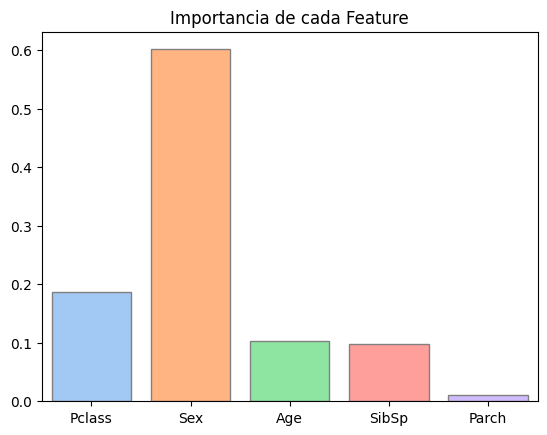

In [50]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances, palette = 'pastel', saturation = 2.0, edgecolor = 'gray', linewidth = 1)
plt.title("Importancia de cada Feature")
plt.show()

## ¿Que podemos llevarnos de este ejemplo?

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo.